# Import necessary libraries

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [24]:
data = pd.read_csv('DATASET.csv')

# Analysis of Dataset

In [25]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [26]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [27]:
data.shape

(2000, 9)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [29]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [30]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


# Plotting of Graphs

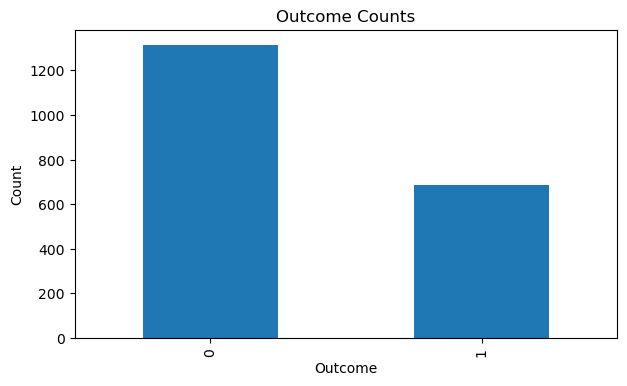

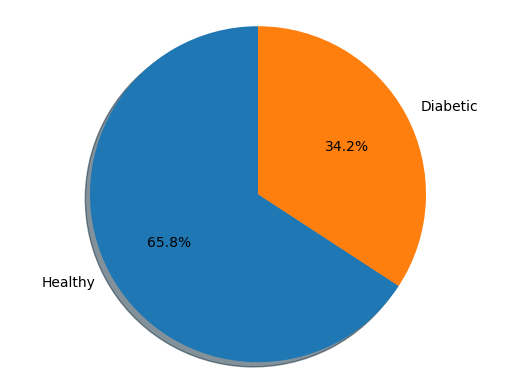

In [32]:
data['Outcome'].value_counts().plot(kind='bar',figsize=(7,4))
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Counts')
plt.show()
labels = ['Healthy', 'Diabetic']
sizes = [*data.Outcome.value_counts()]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax = plt.axis('equal')

# Cooleration Matrix

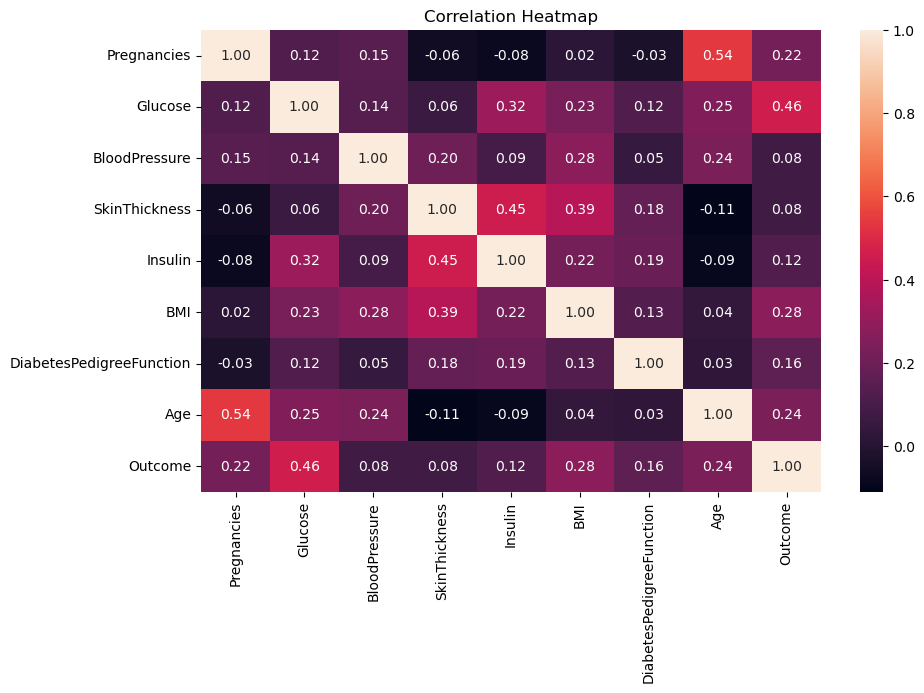

In [33]:
correlation_matrix = data.corr().round(2)
correlation_matrix
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Histogram of data

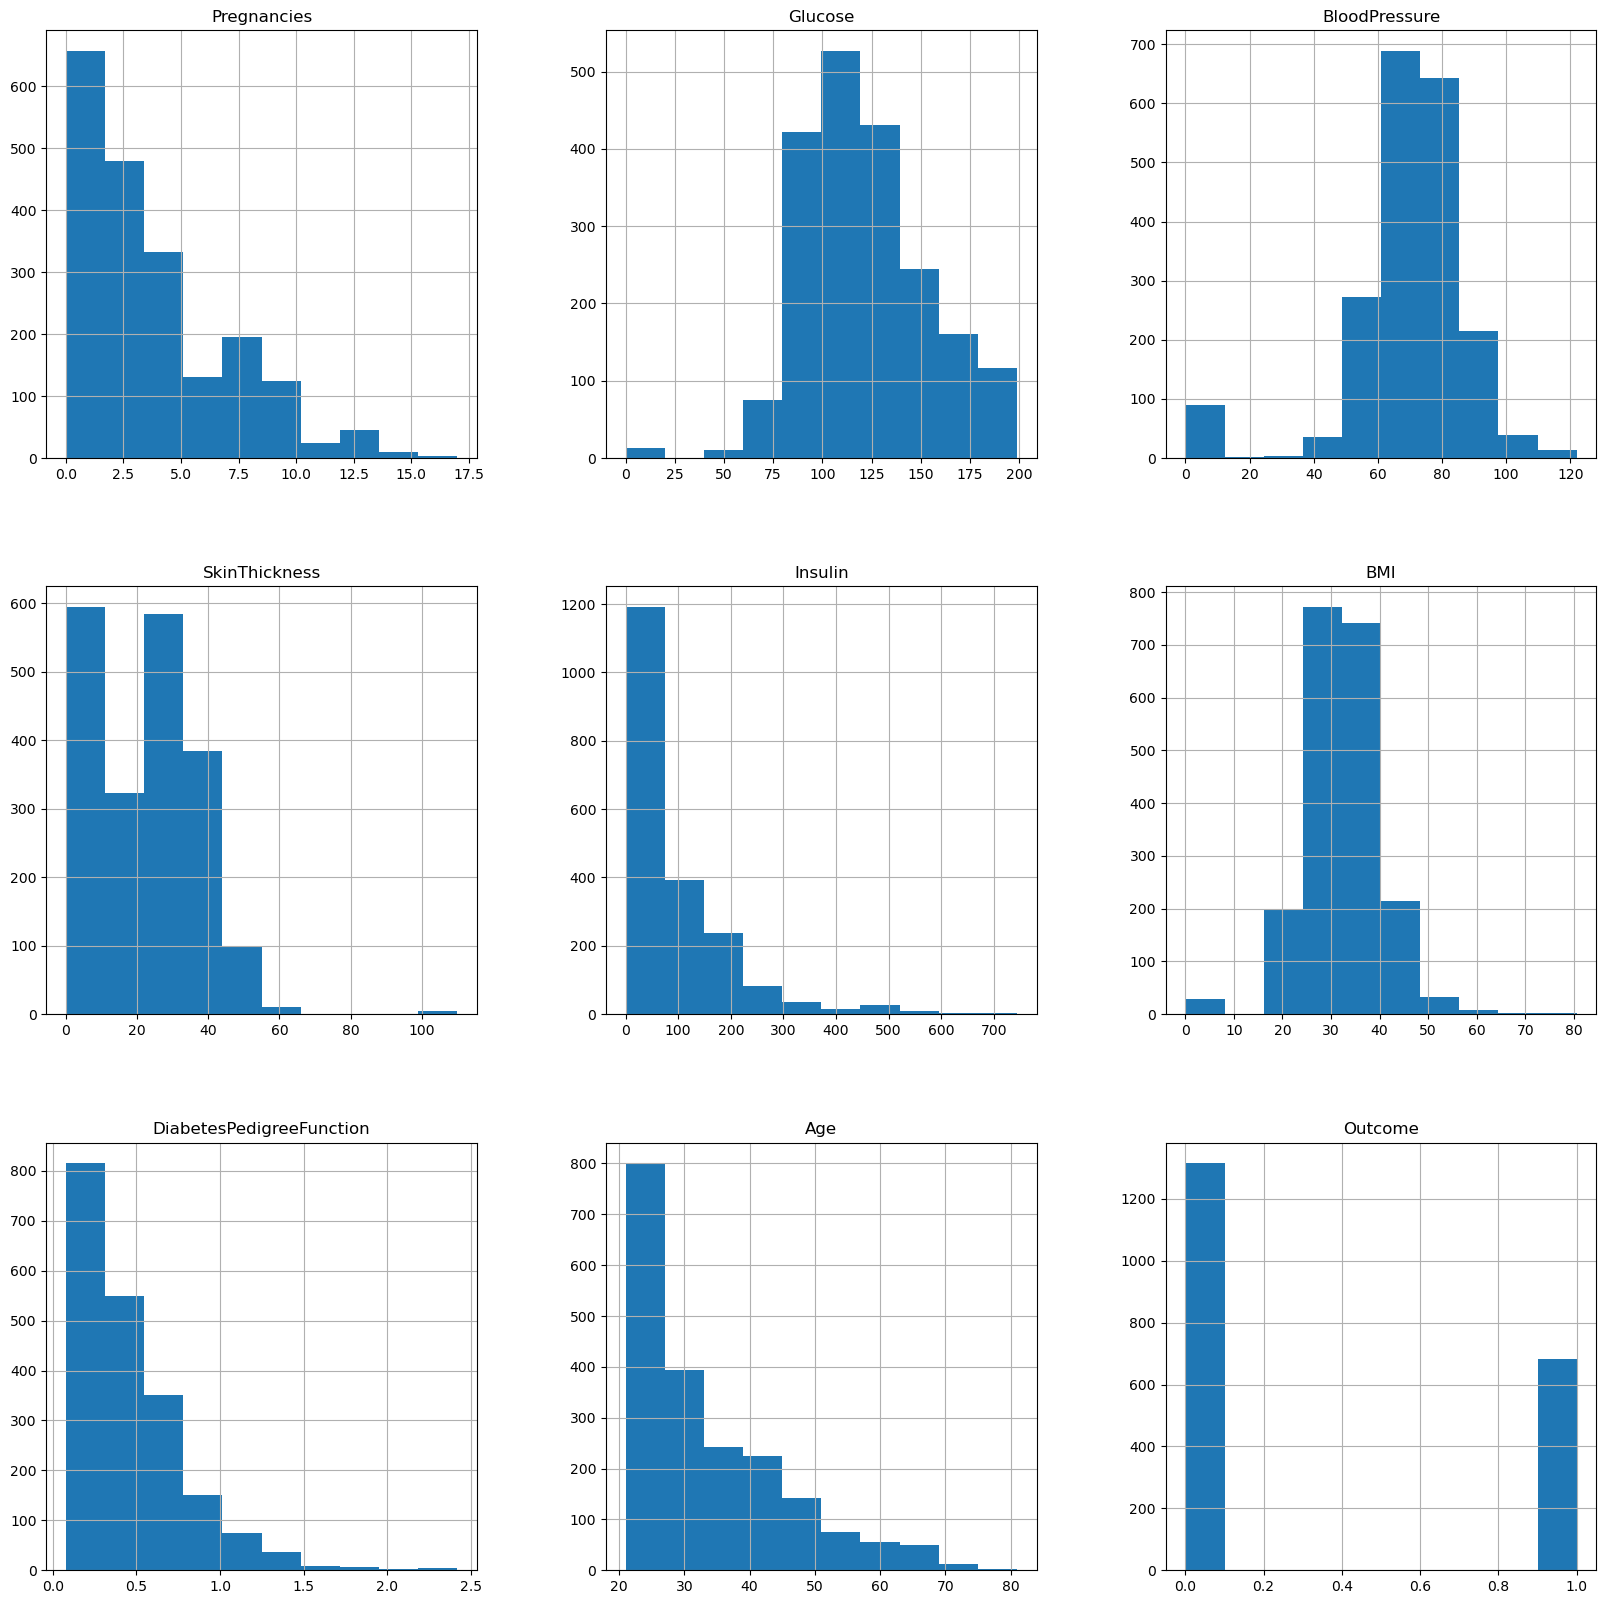

In [34]:
data.hist(figsize=(20,20))
plt.show()

# Separate features and target variable


In [35]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data


In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to train and evaluate a model

In [38]:
print("Traning & Testing Accuracy for All Algorithms: \n")
print("Name Training Accuracy Testing Accuracy\n")
def train_and_evaluate(model, name):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    # Printing the Accuracy of model:
    print(f" {name}   \t{(train_acc)*100:.2f}%  \t\t{(test_acc)*100:.2f}%")
    print()
    
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
train_and_evaluate(rf_model, "RF")

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
train_and_evaluate(knn_model, "KNN")

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
train_and_evaluate(lr_model, "LR")

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
train_and_evaluate(dt_model, "DT")

# Naive Bayes
nb_model = GaussianNB()
train_and_evaluate(nb_model, "NB")

# XGBoost
xgb_model = XGBClassifier(random_state=42)
train_and_evaluate(xgb_model, "XG")

# Support Vector Machine
svm_model = SVC(random_state=42)
train_and_evaluate(svm_model, "SVM")

Traning & Testing Accuracy for All Algorithms: 

Name Training Accuracy Testing Accuracy



 RF   	100.00%  		99.00%

 KNN   	90.88%  		82.25%

 LR   	76.81%  		79.00%

 DT   	100.00%  		98.00%

 NB   	75.94%  		77.75%

 XG   	100.00%  		98.50%

 SVM   	84.62%  		84.50%



# Classification Report 

In [39]:
from sklearn.metrics import classification_report
def train_and_evaluate(model, name):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
 # Classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, test_pred))
    print("="*50)
    
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
train_and_evaluate(rf_model, "Random Forest")

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
train_and_evaluate(knn_model, "KNN")

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
train_and_evaluate(lr_model, "Logistic Regression")

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
train_and_evaluate(dt_model, "Decision Tree")

# Naive Bayes
nb_model = GaussianNB()
train_and_evaluate(nb_model, "Navie Bayes")

# XGBoost
xgb_model = XGBClassifier(random_state=42)
train_and_evaluate(xgb_model, "XGBoosts")

# Support Vector Machine
svm_model = SVC(random_state=42)
train_and_evaluate(svm_model, "Support Vector Machine")


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       253
           1       0.99      0.99      0.99       147

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       253
           1       0.78      0.71      0.75       147

    accuracy                           0.82       400
   macro avg       0.81      0.80      0.81       400
weighted avg       0.82      0.82      0.82       400


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       253
           1       0.80      0.57      0.67       147

    accuracy                           0.79       400
   mac

# Bar Chart with training and testing accuracy

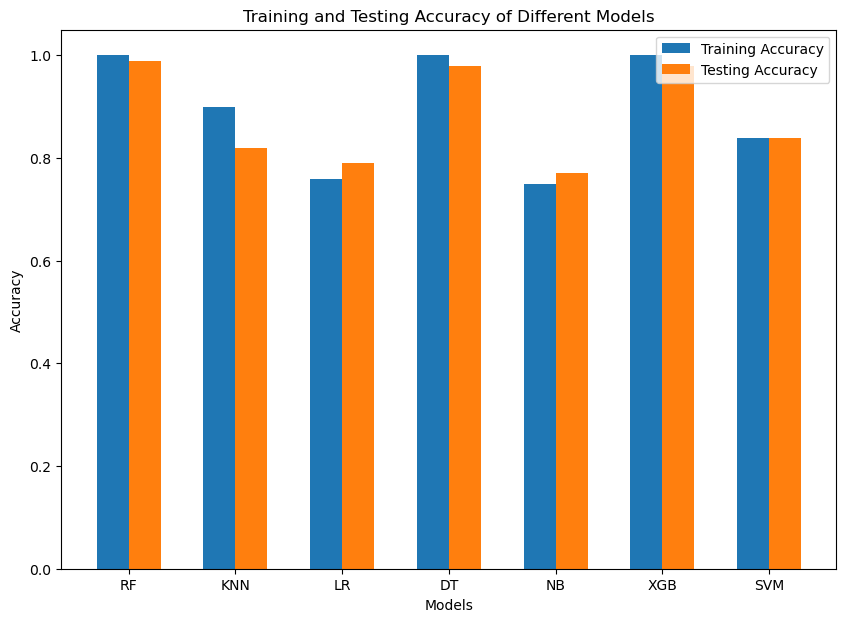

In [40]:
import matplotlib.pyplot as plt

# List of models and their corresponding training and testing accuracies
models = ["RF", "KNN", "LR", "DT", "NB", "XGB", "SVM"]
train_accuracies = [1.0, 0.90, 0.76, 1.0, 0.75, 1.0, 0.84]  # Replace with your actual training accuracies
test_accuracies = [0.99, 0.82, 0.79, 0.98, 0.77, 0.98, 0.84]  # Replace with your actual testing accuracies

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 7))

# Plotting the bar chart
bar_width = 0.30
index = range(len(models))

bar1 = ax.bar(index, train_accuracies, bar_width, label='Training Accuracy')
bar2 = ax.bar([i + bar_width for i in index], test_accuracies, bar_width, label='Testing Accuracy')

# Adding labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Testing Accuracy of Different Models')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(models)
ax.legend()

# Display the bar chart
plt.show()


# Model Comparision Graph

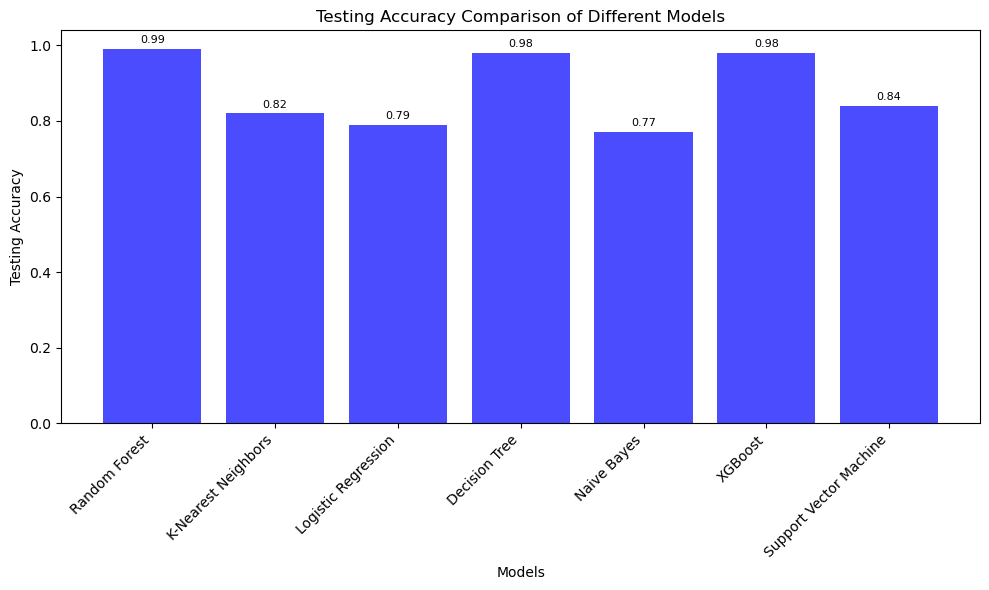

In [41]:
import matplotlib.pyplot as plt

# List of models and their corresponding testing accuracies
models = ["Random Forest", "K-Nearest Neighbors", "Logistic Regression", "Decision Tree", "Naive Bayes", "XGBoost", "Support Vector Machine"]
test_accuracies = [0.99, 0.82, 0.79, 0.98, 0.77, 0.98, 0.84]  # Replace with your actual testing accuracies

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bar chart
index = range(len(models))

bar = ax.bar(index, test_accuracies, color='blue', alpha=0.7)

# Adding labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Testing Accuracy')
ax.set_title('Testing Accuracy Comparison of Different Models')
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=45, ha="right")

# Adding the accuracy values on top of the bars
for i, v in enumerate(test_accuracies):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=8)

# Display the bar chart
plt.tight_layout()
plt.show()


# Confusion Matrix

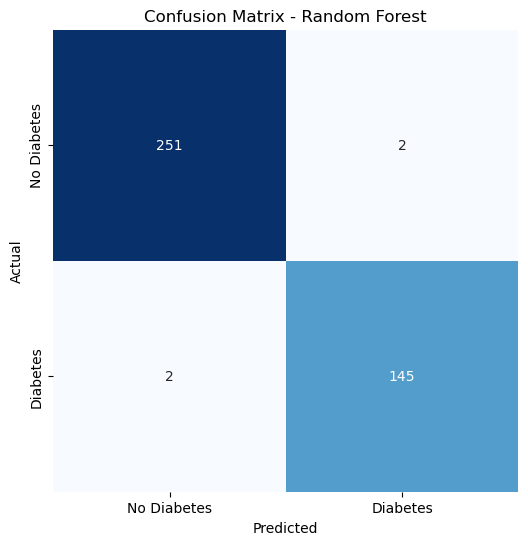

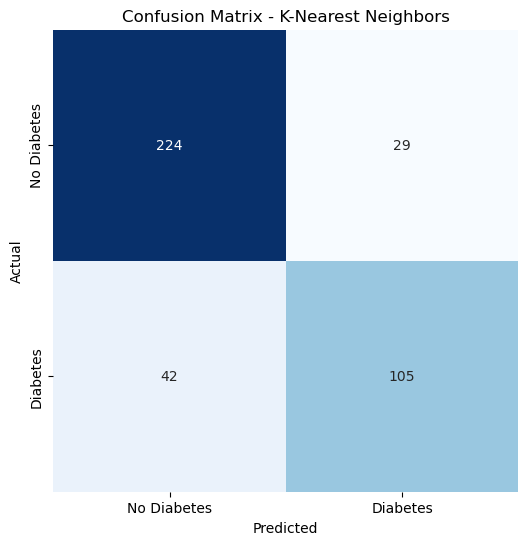

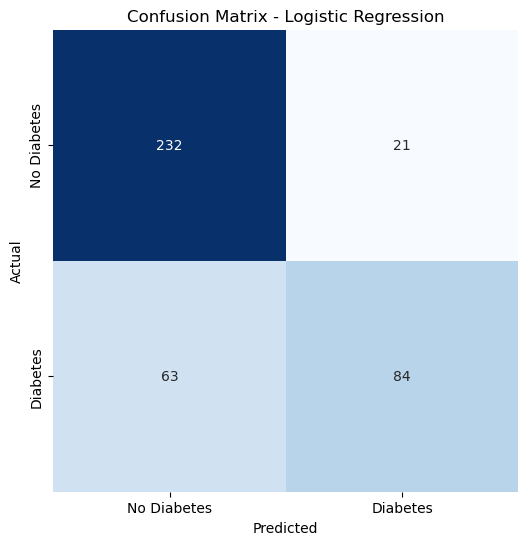

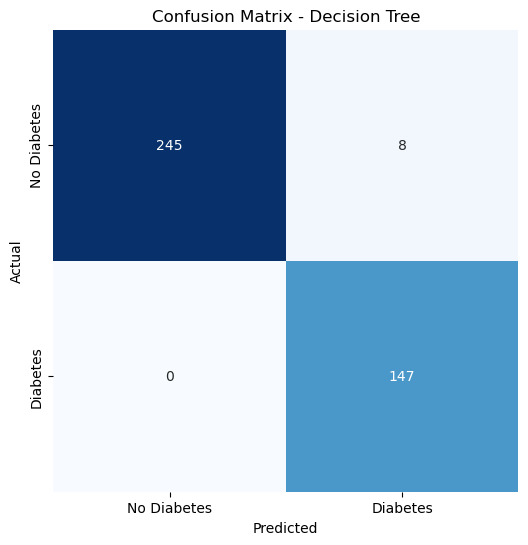

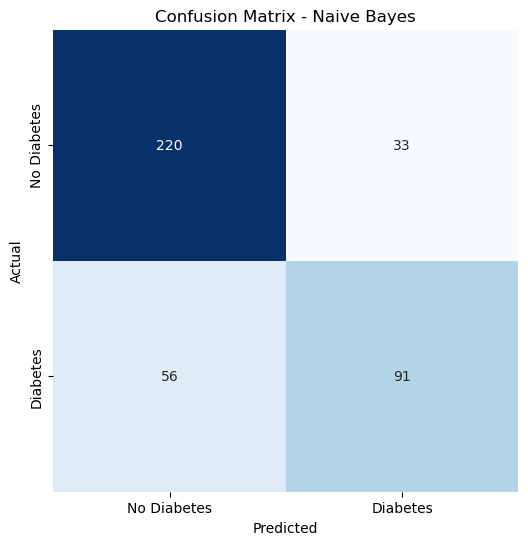

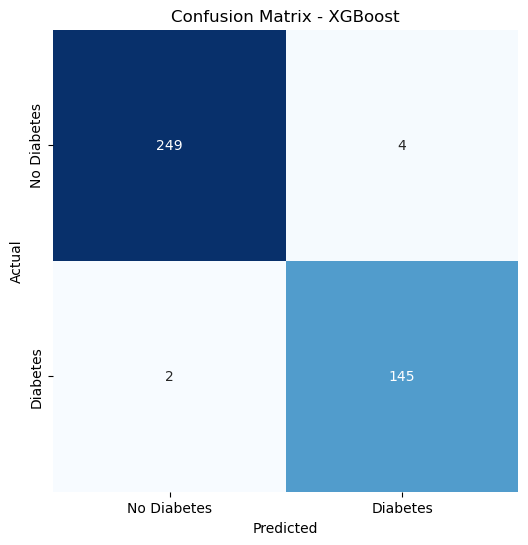

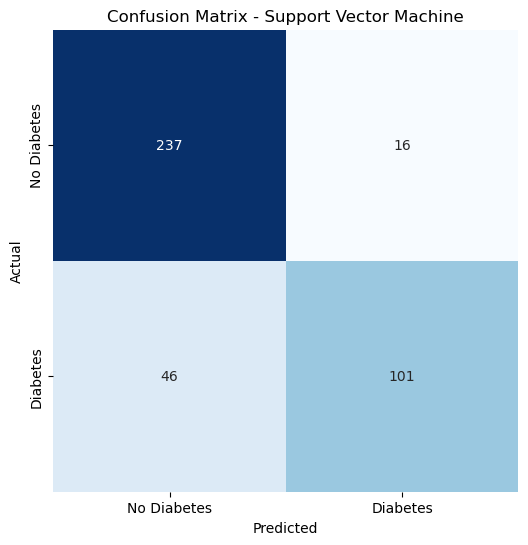

In [42]:
from sklearn.metrics import confusion_matrix
# Function to train a model and plot the confusion matrix
def train_and_plot_confusion_matrix(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix using seaborn
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
train_and_plot_confusion_matrix(rf_model, "Random Forest")

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
train_and_plot_confusion_matrix(knn_model, "K-Nearest Neighbors")

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
train_and_plot_confusion_matrix(lr_model, "Logistic Regression")

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
train_and_plot_confusion_matrix(dt_model, "Decision Tree")

# Naive Bayes
nb_model = GaussianNB()
train_and_plot_confusion_matrix(nb_model, "Naive Bayes")

# XGBoost
xgb_model = XGBClassifier(random_state=42)
train_and_plot_confusion_matrix(xgb_model, "XGBoost")

# Support Vector Machine
svm_model = SVC(random_state=42)
train_and_plot_confusion_matrix(svm_model, "Support Vector Machine")

# Now Find the best Model for Prediction based on Testing Accuracy 

In [43]:
from sklearn.metrics import accuracy_score
print("Name Testing Accuracy\n")
# Train and evaluate models
models = {
    "RF": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "LR": LogisticRegression(random_state=42),
    "DT": DecisionTreeClassifier(random_state=42),
    "NB": GaussianNB(),
    "XGB": XGBClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

best_model_name = None
best_model = None
best_accuracy = 0.0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name}\t{(accuracy)*100:.2f}%")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model = model

print(f"\nThe best model is: {best_model_name} with testing accuracy: {(best_accuracy)*100:.2f}%")


Name Testing Accuracy

RF	99.00%
KNN	82.25%
LR	79.00%
DT	98.00%
NB	77.75%
XGB	98.50%
SVM	84.50%

The best model is: RF with testing accuracy: 99.00%


# Now, use the best model for prediction

In [44]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

# Example of a new instance for prediction (replace with actual values)
new_instance = [[1,144,82,46,180,46.1,0.335,46]]

# Standardize the new instance using the scaler fitted on the training data
new_instance_standardized = scaler.transform(new_instance)

# Make a prediction for the new instance
predicted_result = best_model.predict(new_instance_standardized)

# Print the predicted result
print(f"Predicted Result for the new instance: {predicted_result}")

if predicted_result == 0:
    print('congrats... You\'re allowed to eat sweets!')
else:
    print('Time to take your diet into consideration, Champ!')

Predicted Result for the new instance: [1]
Time to take your diet into consideration, Champ!


c:\Users\Shree\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
